In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [3]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\student\AppData\Local\Temp\ipykernel_8044\3620293503.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [9]:
url_page = 'https://www.naver.com'
driver.get(url_page)

In [10]:
# 더보기 클릭
driver.find_element_by_css_selector('#NM_FAVORITE > div.group_nav > a').click()

C:\Users\student\AppData\Local\Temp\ipykernel_8044\3285501241.py:1: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#NM_FAVORITE > div.group_nav > a').click()


In [12]:
from selenium.webdriver.common.by import By

In [14]:
# 영화
css_selector = '#gnb > div.ly_service > div.group_service.NM_FAVORITE_ALL_LY > dl:nth-child(3) > dd:nth-child(3) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [15]:
# 박스오피스 클릭
css_selector = '#BOXOFFICE_tab > a > em'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [16]:
# 박스오피스 1등클릭
css_selector = '#flick0 > li.item1 > div.obj_off.tab4 > a > span.mask'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [17]:
# 리뷰클릭
css_selector = '#movieEndTabMenu > li:nth-child(6) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [18]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.naver?code=192608'

In [19]:
# pattern = re.compile("[\d+,?]+")
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'192608'

In [20]:
review_url = current_url.replace(code, '{}')
review_url

'https://movie.naver.com/movie/bi/mi/review.naver?code={}'

In [10]:
!mkdir images

In [21]:
# 영화리뷰페이지 바로 이동
# 영화제목 검색키 입력
# send_key는 브로커 입력키

movie_title = '브로커'
driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(movie_title)

C:\Users\student\AppData\Local\Temp\ipykernel_8044\1058986966.py:4: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(movie_title)


In [22]:
# 검색창 검색어 입력
css_selector = '#ipt_tx_srch'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys(movie_title)

In [23]:
# 검색 클릭
css_selector = '#jSearchArea > div > button'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [24]:
# 아이유가 출연한 첫번째링크롤 GO 
css_selector = '#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a > strong'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [25]:
# 리뷰
css_selector = '#movieEndTabMenu > li:nth-child(6) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [26]:
# 첫번째 페이지로 이동
css_selector = '#pagerTagAnchor1 > span'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [27]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [28]:
soup.title

<title>브로커 : 네이버 영화</title>

In [29]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.naver?code=196854&page=1'

In [30]:
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'196854'

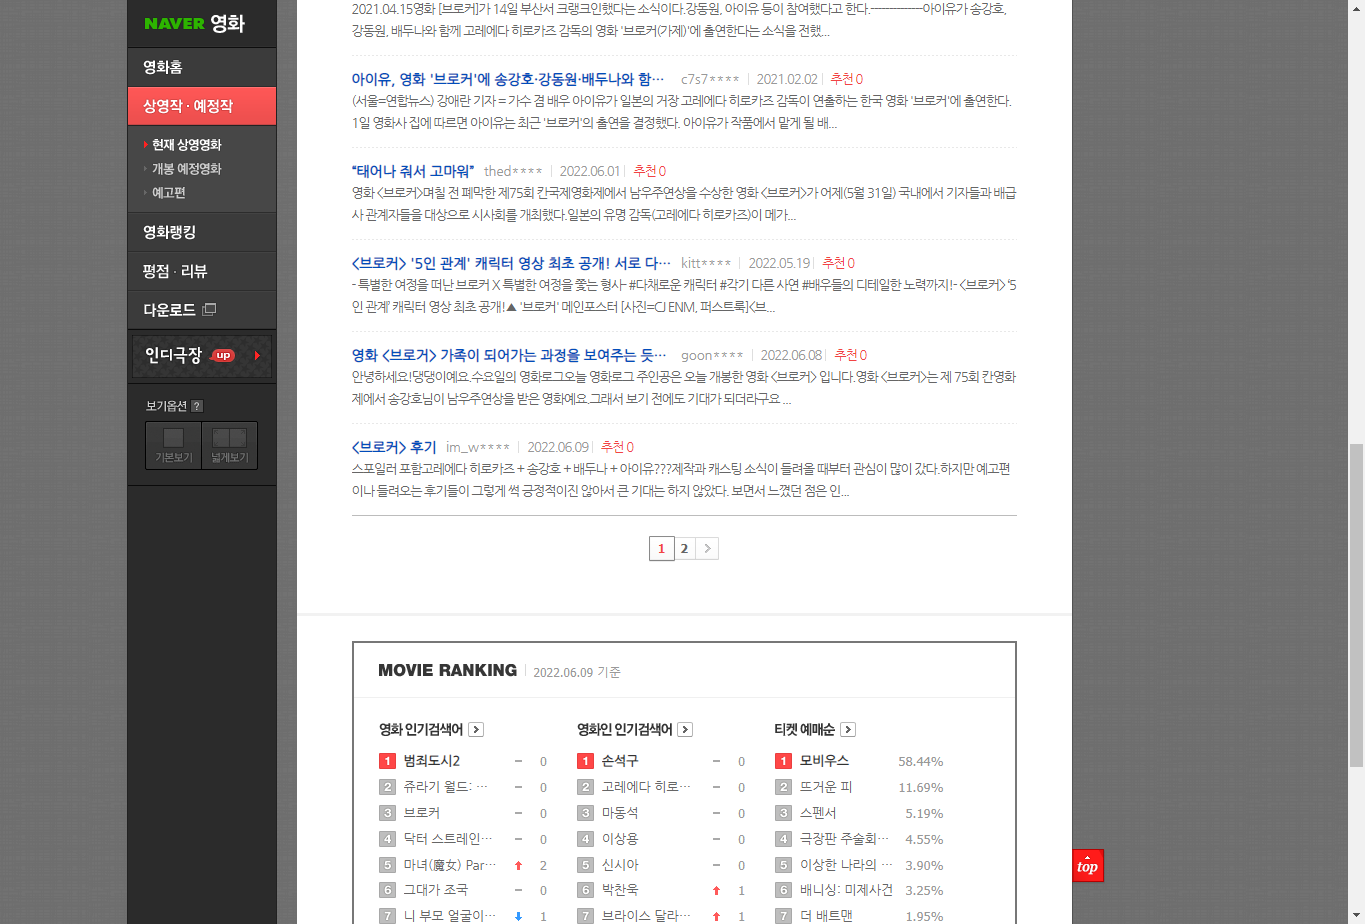

In [21]:
# 리뷰페이지 캡처후 저장
capture_img = './images/naver_movie_{code}.png'.format(code=code)
driver.save_screenshot(capture_img)
Image(capture_img)

In [31]:
# 리뷰페이지로 바로 이동
url_page = review_url.format(code)
driver.get(url_page)

In [32]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
soup.title

<title>브로커 : 네이버 영화</title>

In [33]:
movie_title = soup.title.get_text().split(':')[0].strip()
movie_title

'브로커'

In [34]:
review_cnt = soup.find("span","cnt")
review_cnt

<span class="cnt">총<em>13</em>건</span>

In [35]:
review_cnt2 = review_cnt.find("em").get_text()
review_cnt2

'13'

In [36]:
review_cnt_total = int(review_cnt2.replace(',', ''))
review_cnt_total

13

In [37]:
last_page = review_cnt_total//10 + 1
last_page

2

In [38]:
'영화 "{}"의 리뷰수는 총 {}건이며, 마지막 페이지는 {} 입니다.'.format(movie_title, review_cnt_total, last_page)

'영화 "브로커"의 리뷰수는 총 13건이며, 마지막 페이지는 2 입니다.'

In [39]:
# 리뷰 마지막 페이지로 이동
url_page = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}'.format(code, last_page)
driver.get(url_page)